<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_F4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/F4.csv")
X = data.iloc[:,1:26] #independent columns
y = data[['Sleep Stage']]   #target column 

In [20]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [23]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,78.021415
1,MedianF_Alpha_F4,620.102091
2,MeanF_Alpha_F4,4172.268952
3,Spectral Edge_Alpha_F4,4731.573112
4,PeakF_Alpha_F4,380.123037
5,MeanP_Beta_F4,61.408861
6,MedianF_Beta_F4,3071.519331
7,MeanF_Beta_F4,1412.650621
8,Spectral Edge_Beta_F4,3945.471101
9,PeakF_Beta_F4,7967.979123


In [24]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_F4  7967.979123
3   Spectral Edge_Alpha_F4  4731.573112
2           MeanF_Alpha_F4  4172.268952
8    Spectral Edge_Beta_F4  3945.471101
6          MedianF_Beta_F4  3071.519331
24          PeakF_Gamma_F4  1956.681208
7            MeanF_Beta_F4  1412.650621
19          PeakF_Delta_F4  1304.037573
14          PeakF_Theta_F4  1152.365608
17          MeanF_Delta_F4   985.733819


#Another Algorithm to Compare the result (ExtraTreesClassifier)

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_F4  7967.979123
3   Spectral Edge_Alpha_F4  4731.573112
2           MeanF_Alpha_F4  4172.268952
8    Spectral Edge_Beta_F4  3945.471101
6          MedianF_Beta_F4  3071.519331
24          PeakF_Gamma_F4  1956.681208
7            MeanF_Beta_F4  1412.650621
19          PeakF_Delta_F4  1304.037573
14          PeakF_Theta_F4  1152.365608
17          MeanF_Delta_F4   985.733819


In [26]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03259236 0.03120857 0.06268557 0.0529901  0.02851199 0.03240211
 0.06325508 0.04333469 0.04606905 0.03379013 0.03361516 0.07332952
 0.03775066 0.03610913 0.03907904 0.03407791 0.03030691 0.06327163
 0.0454989  0.02690723 0.0319517  0.03727488 0.033547   0.02998421
 0.02045646]


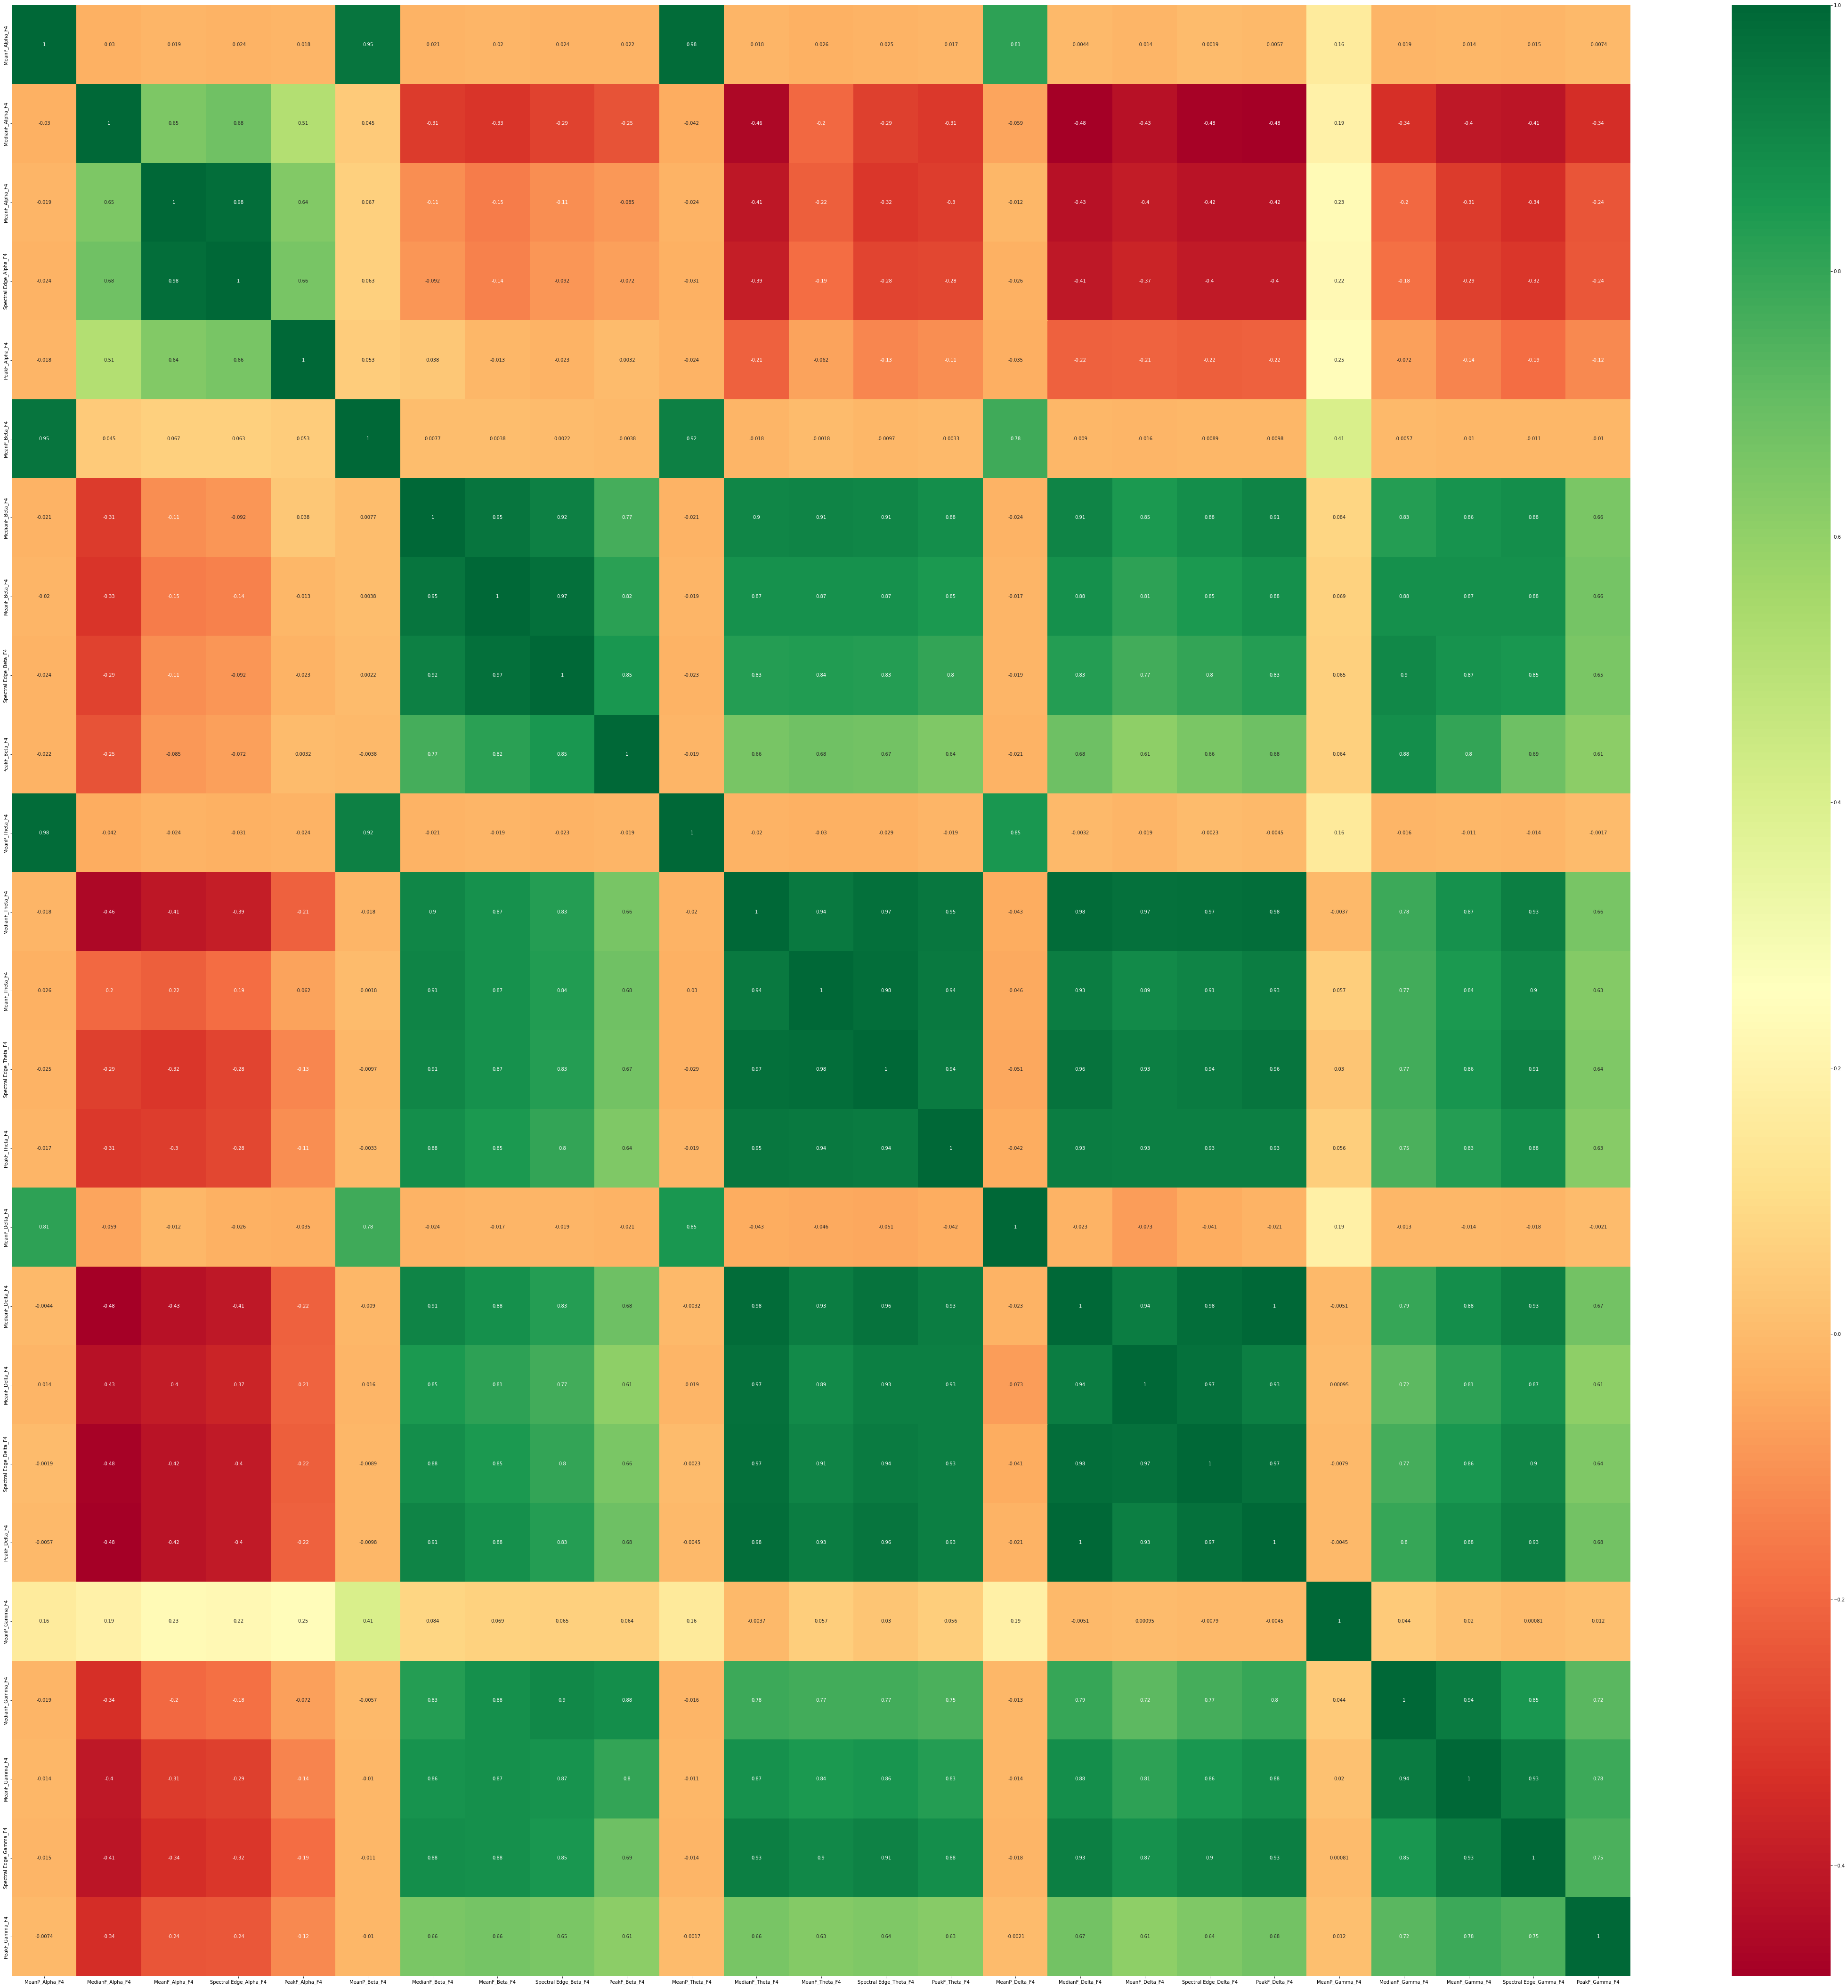

In [27]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")